In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
my_data_dir = "C:\\Users\\Rohan\\Downloads\\face_data"

In [3]:
os.listdir(my_data_dir) 

['test', 'train']

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(train_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
os.listdir(train_path+'\\angry')[0]

'Training_10118481.jpg'

In [7]:
angry_face = train_path+'\\angry'+'\\Training_10118481.jpg'

In [8]:
angry_img= imread(angry_face)

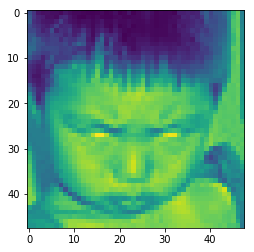

In [9]:
plt.imshow(angry_img)

In [10]:
angry_img.shape

(48, 48)

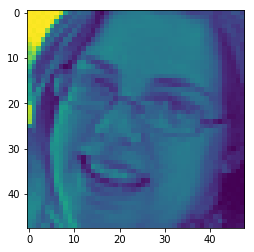

In [11]:
happy_face_path = train_path+'\\happy\\'+os.listdir(train_path+'\\happy')[0]
happy_face = imread(happy_face_path)
plt.imshow(happy_face)

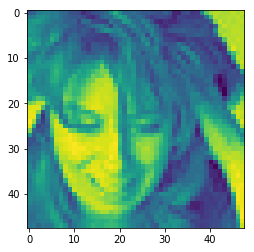

In [13]:
sad_face_path = train_path+'\\sad\\'+os.listdir(train_path+'\\sad')[0]
sad_face = imread(sad_face_path)
plt.imshow(sad_face)

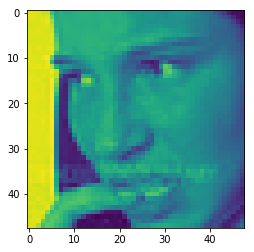

In [14]:
fear_face_path = train_path+'\\fear\\'+os.listdir(train_path+'\\fear')[0]
fear_face = imread(fear_face_path)
plt.imshow(fear_face)

In [15]:
len(os.listdir(train_path+'\\happy'))

7215

In [16]:
len(os.listdir(test_path+'\\happy'))

1774

In [17]:
happy_face.shape

(48, 48)

In [18]:
angry_img.shape

(48, 48)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [24]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [25]:
cv2.ocl.setUseOpenCL(False)

In [26]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [32]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001, decay=1e-6),metrics=['accuracy'])

In [33]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
validation_generator = val_datagen.flow_from_directory(
        test_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [36]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 448 steps, validate for 112 steps
Epoch 1/50
448/448 [==============================] - 248s 553ms/step - loss: 1.7218 - accuracy: 0.3060 - val_loss: 1.5188 - val_accuracy: 0.4205
Epoch 2/50
448/448 [==============================] - 241s 537ms/step - loss: 1.4777 - accuracy: 0.4276 - val_loss: 1.3835 - val_accuracy: 0.4682
Epoch 3/50
448/448 [==============================] - 246s 549ms/step - loss: 1.3442 - accuracy: 0.4850 - val_loss: 1.2507 - val_accuracy: 0.5257
Epoch 4/50
448/448 [==============================] - 261s 582ms/step - loss: 1.2665 - accuracy: 0.5178 - val_loss: 1.2192 - val_accuracy: 0.5273
Epoch 5/50
448/448 [==============================] - 276s 616ms/step - loss: 1.2096 - accuracy: 0.5395 - val_loss: 1.1513 - val_accuracy: 0.5572
Epoch 6/50
448/448 [==============================] - 280s 624ms/step - loss: 1.1632 - accuracy: 0.5572 - val_loss: 1.1359 - val_accuracy: 0.5671
Epoch 7/50
448/448 [==========

In [42]:
from tensorflow.keras.models import load_model
emotion_model.save('emotion_model.h5')

In [43]:
emotion_model.save_weights('emotion_model.h5')

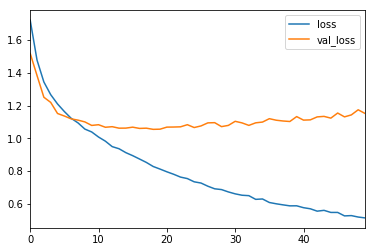

In [39]:
losses[['loss','val_loss']].plot()

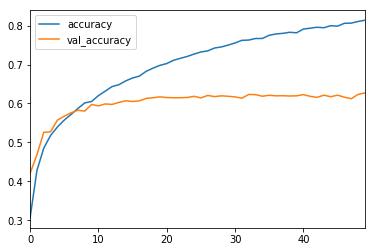

In [54]:
losses[['accuracy','val_accuracy']].plot()

In [55]:
from tensorflow.keras.preprocessing import image

In [58]:
pred_probabilities = emotion_model.predict_generator(validation_generator)

In [59]:
pred_probabilities

array([[4.69147205e-01, 3.75009658e-05, 1.16116166e-01, ...,
        5.22831976e-02, 3.55277121e-01, 4.25792113e-03],
       [3.61533090e-02, 1.42170594e-03, 5.27769685e-01, ...,
        6.27306029e-02, 3.71412903e-01, 4.68389830e-04],
       [1.05436696e-02, 4.81257757e-07, 1.54204899e-02, ...,
        4.58396832e-03, 1.63377970e-02, 1.61382407e-01],
       ...,
       [4.15366739e-01, 4.99859780e-05, 5.75407028e-01, ...,
        8.96288930e-06, 8.84275790e-03, 3.24042456e-04],
       [1.13095564e-06, 1.87893950e-10, 6.25249452e-09, ...,
        5.73972954e-07, 1.65319882e-08, 2.40521726e-18],
       [1.91411446e-03, 8.94530956e-08, 1.06220551e-01, ...,
        3.17483433e-02, 8.57951343e-01, 9.52830131e-04]], dtype=float32)

In [60]:
validation_generator.classes

array([0, 0, 0, ..., 6, 6, 6])

In [61]:
predictions = pred_probabilities > 0.5

In [62]:
predictions

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [65]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


In [71]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [66]:
video = cv2.VideoCapture(0);

In [74]:
while True:
    check, frame = video.read();
    if not ret:
        break
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor = 1.1, minNeighbors = 5);
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

KeyboardInterrupt: 

In [75]:
cap.release()
cv2.destroyAllWindows()